# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 4. Responses 7 and 8

### 1. Importing Visualization Libraries and Data

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [39]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [40]:
# Create Path to create folder into a string
path = r'C:\Users\E054746\OneDrive - RSM\Data Analytics\CareerFoundry\Data Immersion\Achievement 6\US Regional Sales Analysis'

In [41]:
# Import US Regional Sales Data (scrubbed version)
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'us_regional_sales_clean.pkl'))

### 2. Data Cleaning

#### Renaming Columns:

In [6]:
df.shape

(7991, 29)

In [7]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Procured_Date', 'Order_Date',
       'Ship_Date', 'Delivery_Date', 'SalesTeam_ID', 'Customer_ID', 'Store_ID',
       'Product_ID', 'Order_Quantity', 'Discount_Applied', 'Unit_Price',
       'Unit_Cost', 'Customer_Names', 'Product_Name', 'City_Name', 'County',
       'State_Code', 'State', 'Type', 'Latitude', 'Longitude', 'Population',
       'Household_Income', 'Median_Income', 'Time_Zone', 'Region',
       'Sales_Team'],
      dtype='object')

In [8]:
df.dtypes

Order_Number                object
Sales_Channel             category
Procured_Date       datetime64[ns]
Order_Date          datetime64[ns]
Ship_Date           datetime64[ns]
Delivery_Date       datetime64[ns]
SalesTeam_ID                object
Customer_ID                 object
Store_ID                    object
Product_ID                  object
Order_Quantity               int64
Discount_Applied           float64
Unit_Price                 float64
Unit_Cost                  float64
Customer_Names              object
Product_Name                object
City_Name                   object
County                      object
State_Code                category
State                     category
Type                      category
Latitude                   float64
Longitude                  float64
Population                   int64
Household_Income             int64
Median_Income                int64
Time_Zone                   object
Region                    category
Sales_Team          

In [20]:
# Change options to display all columns
pd.options.display.max_columns = None

In [42]:
df.head()

,Order_Number,Sales_Channel,Procured_Date,Order_Date,Ship_Date,Delivery_Date,SalesTeam_ID,Customer_ID,Store_ID,Product_ID,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Customer_Names,Product_Name,City_Name,County,State_Code,State,Type,Latitude,Longitude,Population,Household_Income,Median_Income,Time_Zone,Region,Sales_Team
0,SO - 000101,In-Store,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1963.1,1001.181,Rochester Ltd,Dining Furniture,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
1,SO - 0005035,In-Store,2019-08-23,2020-01-08,2020-01-15,2020-01-21,6,47,259,1,3,0.150,1755.4,1298.996,Niconovum Corp,Cookware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
2,SO - 0006409,In-Store,2020-03-10,2020-06-17,2020-07-03,2020-07-12,6,41,259,16,5,0.075,3544.3,2020.251,Weimei Corp,Stemware,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
3,SO - 0006713,In-Store,2020-03-10,2020-07-21,2020-08-15,2020-08-16,6,48,259,6,3,0.075,2492.4,1246.200,"Fenwal, Corp",Computers,Babylon (Town),Suffolk County,NY,New York,Town,40.64092,-73.31669,213776,68789,80327,America/New York,Northeast,Joshua Bennett
4,SO - 0007028,In-Store,2020-06-18,2020-08-29,2020-09-11,2020-09-14,6,44,112,14,3,0.200,3993.2,3034.832,Winthrop,Mirrors,Waterbury (Town),New Haven County,CT,Connecticut,Town,41.55850,-73.03668,108802,40213,40467,America/New York,Northeast,Joshua Bennett


### Create a subset dataframe to exlude  unnecessary columns

In [51]:
# Create a subset excluding the "Date", "Order_Number","SalesTeam_ID","Customer_ID","Store_ID","Product_ID", "Procured_Date","Order_Date,"Ship_Date","Delivery_Date","State Code",Latitude","Longitude","Time Zone"

sub = df[['Sales_Channel','County','Order_Quantity','Discount_Applied','Unit_Price','Unit_Cost','Customer_Names','Product_Name','City_Name','State','Type','Population', 'Household_Income','Median_Income','Region','Sales_Team']]

In [52]:
sub

,Sales_Channel,County,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Customer_Names,Product_Name,City_Name,State,Type,Population,Household_Income,Median_Income,Region,Sales_Team
0,In-Store,Suffolk County,5,0.075,1963.1,1001.181,Rochester Ltd,Dining Furniture,Babylon (Town),New York,Town,213776,68789,80327,Northeast,Joshua Bennett
1,In-Store,Suffolk County,3,0.150,1755.4,1298.996,Niconovum Corp,Cookware,Babylon (Town),New York,Town,213776,68789,80327,Northeast,Joshua Bennett
2,In-Store,Suffolk County,5,0.075,3544.3,2020.251,Weimei Corp,Stemware,Babylon (Town),New York,Town,213776,68789,80327,Northeast,Joshua Bennett
3,In-Store,Suffolk County,3,0.075,2492.4,1246.200,"Fenwal, Corp",Computers,Babylon (Town),New York,Town,213776,68789,80327,Northeast,Joshua Bennett
4,In-Store,New Haven County,3,0.200,3993.2,3034.832,Winthrop,Mirrors,Waterbury (Town),Connecticut,Town,108802,40213,40467,Northeast,Joshua Bennett
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,In-Store,Brown County,1,0.050,3825.7,2333.677,Medline,Pillows,Green Bay,Wisconsin,City,105207,42308,42826,Midwest,Stephen Payne
7987,In-Store,East Baton Rouge Parish,6,0.400,1038.5,810.030,Winthrop,Blankets,Baton Rouge,Louisiana,City,228590,88476,39876,South,Stephen Payne
7988,In-Store,East Baton Rouge Parish,8,0.200,3825.7,2295.420,Victory Ltd,Vases,Baton Rouge,Louisiana,City,228590,88476,39876,South,Stephen Payne
7989,In-Store,Clark County,3,0.200,1755.4,1298.996,Ei,Wall Coverings,Las Vegas,Nevada,City,623747,215614,50202,West,Stephen Payne


#### Missing Values Check:

In [26]:
# Check for missing values

df.isnull().sum() # No missing values!

Order_Number          0
Sales_Channel         0
Procured_Date         0
Order_Date            0
Ship_Date             0
Delivery_Date         0
SalesTeam_ID          0
Customer_ID           0
Store_ID              0
Product_ID            0
Order_Quantity        0
Discount_Applied      0
Unit_Price            0
Unit_Cost             0
Customer_Names        0
Product_Name          0
City_Name             0
County                0
State_Code            0
State                 0
Type                  0
Latitude              0
Longitude             0
Population            0
Household_Income      0
Median_Income         0
Time_Zone             0
Region                0
Sales_Team            0
HH income category    0
Price category        0
dtype: int64

#### Duplicates Check:

In [27]:
# Find duplicates

df_dups = df[df.duplicated()]

In [28]:
df_dups.shape # No duplicatess.

(0, 31)

#### Mixed-Type Data:

In [29]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
        
# No mixed-type columns either.

### 3. Exploring Relationships

### Correlations:

In [53]:
# Create a correlation matrix using pandas

sub.corr()

,Order_Quantity,Discount_Applied,Unit_Price,Unit_Cost,Population,Household_Income,Median_Income
Order_Quantity,1.000000,-0.007733,0.002566,0.001814,-0.030292,-0.029884,0.024592
Discount_Applied,-0.007733,1.000000,0.014439,0.012184,0.024115,0.024659,0.010957
Unit_Price,0.002566,0.014439,1.000000,0.942167,0.007536,0.006754,-0.005468
Unit_Cost,0.001814,0.012184,0.942167,1.000000,0.006388,0.005490,-0.004258
Population,-0.030292,0.024115,0.007536,0.006388,1.000000,0.992957,-0.100245
Household_Income,-0.029884,0.024659,0.006754,0.005490,0.992957,1.000000,-0.094796
Median_Income,0.024592,0.010957,-0.005468,-0.004258,-0.100245,-0.094796,1.000000


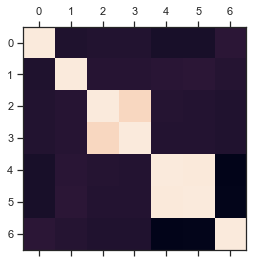

In [54]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

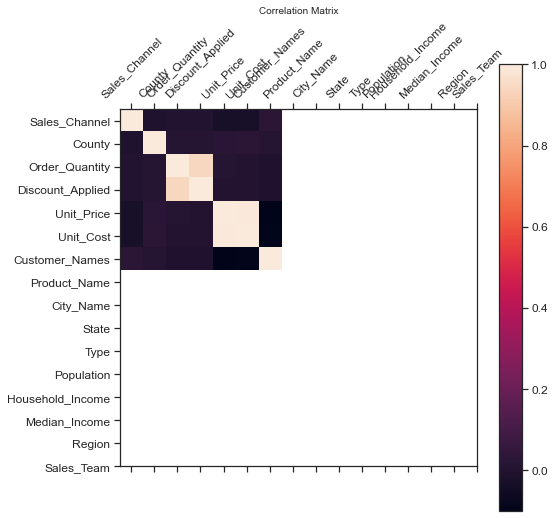

In [55]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=10) # add title

Seems like the plot above is not legible and thereforem, seaborn, might be a better approach

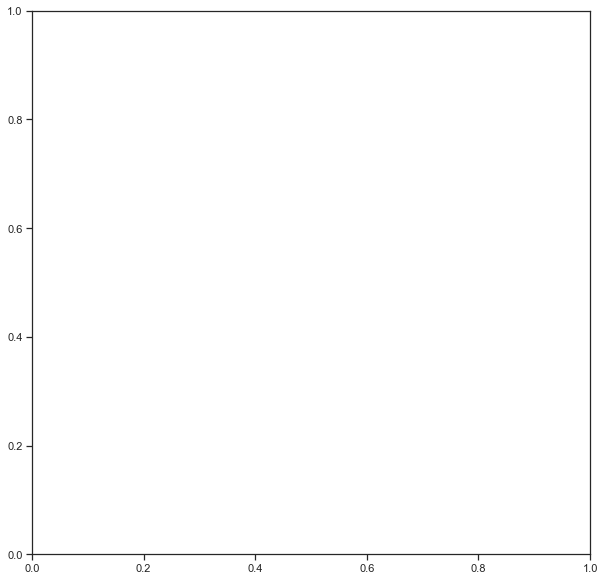

In [48]:
# Create a subplot with matplotlib. just to show the subplots.

f,ax = plt.subplots(figsize=(10,10))

In [49]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

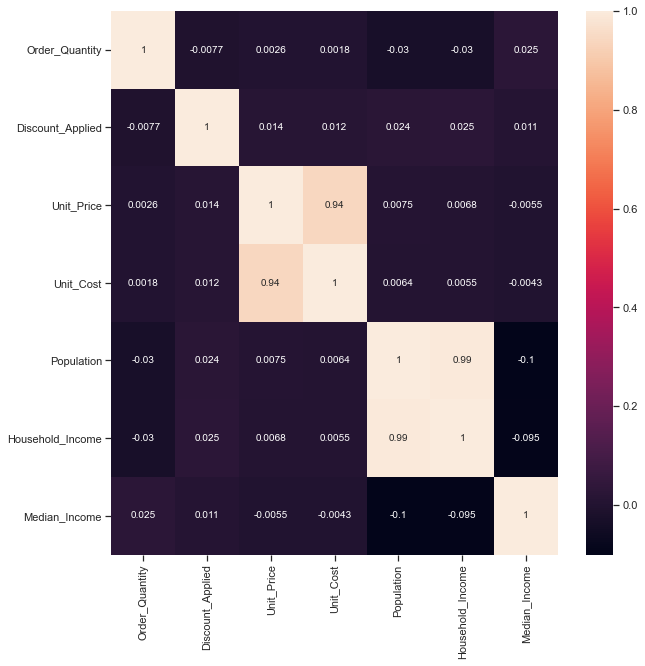

In [50]:
corr.figure

#### correlation observations:
   - With "Household Income": A 0.99 coefficient indicates a strong positive correlation, which means that higher the population the higher the household income - makes sense.  
   - With "Unit Price": a coefficient of 0.94 indicates a strong positive correlation. Can be interpreted as the higher the cost to make a product, the higher the price it will be. Again, makes sense as a company needs to make a margin. 


### Scatterplots:

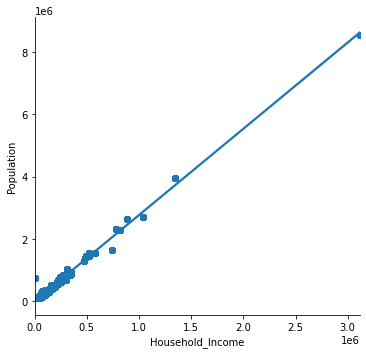

In [35]:
# Create a scatterplot for the "household income" and "population" columns in seaborn

sns.lmplot(x = 'Household_Income', y = 'Population', data = df)

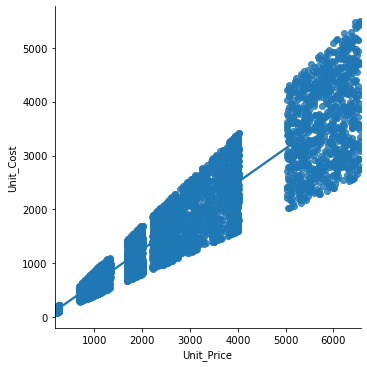

In [38]:
# Create a scatterplot for the "Unit Price" and "Unit Cost" columns in seaborn

sns.lmplot(x = 'Unit_Price', y = 'Unit_Cost', data = df)

#### Scatterplot Observations
- Household Income and Population have a strong linear correlation with Population. Which makes sense, as a region with higher populations will have more job opportunities with higher paying jobs.
- Unit Cost and Unit Price also have an upward trend and while there is a relationship between cost and price, it seems there is a variance between this relationship

### Pair Plots:

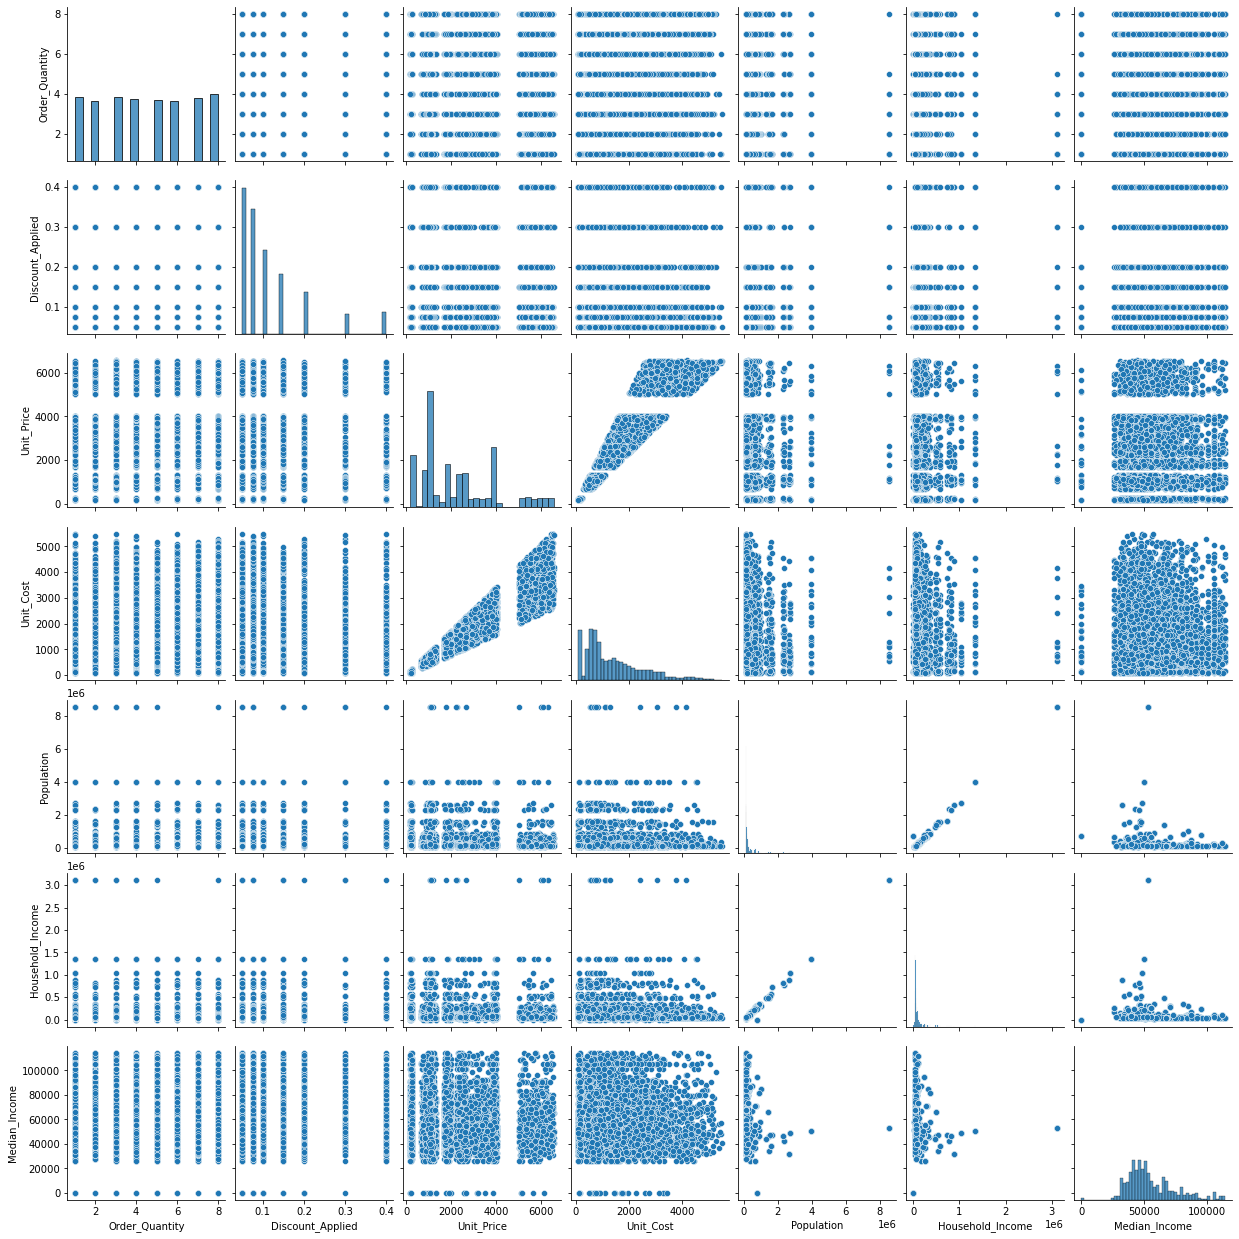

In [39]:
# Create a pair plot 

g = sns.pairplot(sub)

#### Pair Plot Conclusions
- Again, the pair plot indicates that there is a strong correlation between Population and Household Income. This information is good for further analysis to understand the marketplace and sales. 
- There' also a positive correlation between unit cost and unit price, but it would be interesting to see what product cost more with lower profit margins. 
- It looks like Unit Cost is left skewed but unit price is slightly less left-skewed with some prices being on the lower end. 

### Categorical Plots:

##### Creating a categorical variable that splits the "Unit_Cost" column into categories

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Unit_Price', ylabel='Density'>

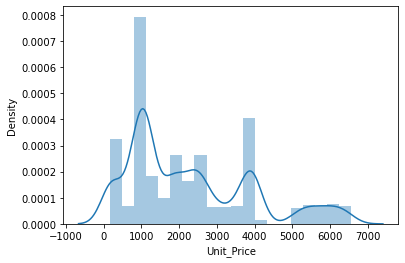

In [40]:
# Use a histogram to visualize the distribution of the variables. 

sns.distplot(df['Unit_Price'], bins = 20)

In [57]:
df.loc[df['Unit_Price'] < 1000.0, 'Price category'] = 'Low price'

In [58]:
df.loc[(df['Unit_Price'] >= 1000.0) & (df['Unit_Price'] < 3000.0), 'Price category'] = 'Mid price'

In [59]:
df.loc[df['Unit_Price'] >= 3000.0, 'Price category'] = 'High price'

In [60]:
df['Price category'].value_counts(dropna = False)

Mid price     3939
High price    2327
Low price     1725
Name: Price category, dtype: int64

In [61]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Procured_Date', 'Order_Date',
       'Ship_Date', 'Delivery_Date', 'SalesTeam_ID', 'Customer_ID', 'Store_ID',
       'Product_ID', 'Order_Quantity', 'Discount_Applied', 'Unit_Price',
       'Unit_Cost', 'Customer_Names', 'Product_Name', 'City_Name', 'County',
       'State_Code', 'State', 'Type', 'Latitude', 'Longitude', 'Population',
       'Household_Income', 'Median_Income', 'Time_Zone', 'Region',
       'Sales_Team', 'Price category'],
      dtype='object')

##### Creating a categorical variable that splits the "Household_Income" column into categories

C:\Users\E054746\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Household_Income', ylabel='Density'>

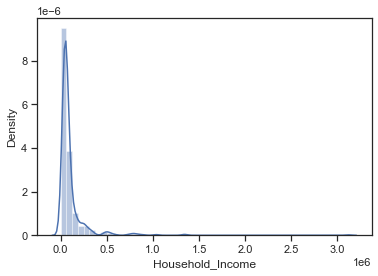

In [20]:
# Use a histogram to visualize the distribution of the variables. 

sns.distplot(df['Household_Income'], bins = 50)

In [62]:
# Look for the max income level to create an income category
df['Household_Income'].max()

3113535

In [63]:
# Look for the min household income level to create an income category
df['Household_Income'].min()

0

In [64]:
df.loc[df['Household_Income'] < 40000, 'HH income category'] = 'Lower income'

In [65]:
df.loc[(df['Household_Income'] >= 40000) & (df['Household_Income'] < 95000), 'HH income category'] = 'Mid income'

In [66]:
df.loc[df['Household_Income'] >= 95000, 'HH income category'] = 'High income'

In [67]:
df['HH income category'].value_counts(dropna = False)

Mid income      4744
High income     1832
Lower income    1415
Name: HH income category, dtype: int64

In [68]:
df.columns

Index(['Order_Number', 'Sales_Channel', 'Procured_Date', 'Order_Date',
       'Ship_Date', 'Delivery_Date', 'SalesTeam_ID', 'Customer_ID', 'Store_ID',
       'Product_ID', 'Order_Quantity', 'Discount_Applied', 'Unit_Price',
       'Unit_Cost', 'Customer_Names', 'Product_Name', 'City_Name', 'County',
       'State_Code', 'State', 'Type', 'Latitude', 'Longitude', 'Population',
       'Household_Income', 'Median_Income', 'Time_Zone', 'Region',
       'Sales_Team', 'Price category', 'HH income category'],
      dtype='object')

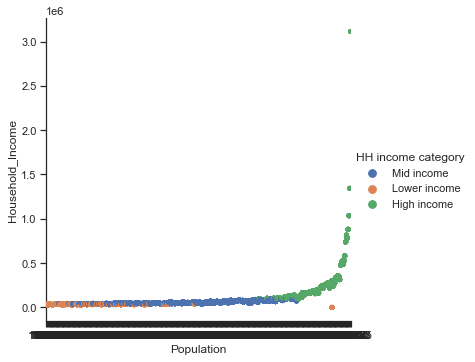

In [70]:
# Create a categorical plot in seaborn using the hh income categories created above

sns.set(style="ticks")
income_cat = sns.catplot(x='Population', y='Household_Income', hue='HH income category', data=df)

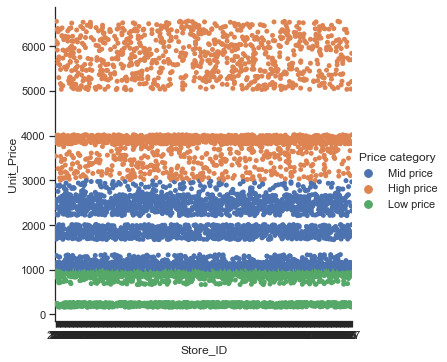

In [71]:
# Create a categorical plot in seaborn using the hh income categories created above

sns.set(style="ticks")
store_cat = sns.catplot(x='Store_ID', y='Unit_Price', hue='Price category', data=df)

Not much can be inferred with this chart.

#### Categorical Plot Reflection
- The chart above slightly confirms that the larger the population, the higher the income.

### Question 7 - Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### 1.	What region brought the most sales?
    - I was not able to gather information for this question. It would have been good to see if there was a correlation between region and sales. However, I don't have a total sales variable in my data set. 
#### 2.	What sales representative was the highest performer? Who was the lowest?
    - I was not able to gather information for this as well. 
#### 3.	Who where the top customers? 
    - I believe this would probably be anwered through a different analysis?
#### 4.	What sales channel was the most effective?
    - This is a categorical variable and it was not included in the correlation matrix. Not sure why.
#### 5.	Does household income have an influence on sales? 
    - This is one variable that will be worth exploring and can be used as one hypothesis. 
#### 6.	What are the sales trend over the years?
    - This question may be answered through a different analysis

### Question 8 Define any hypotheses that you can at this point. You’ll be testing these later on.
- A couple of hypothesis came out of this task. 
    1. The higher the unit price, the higher the unit cost. Please note that seaborn took over an hour to try to plot this category, and as a result, I had to stop the process. 
    2. This hypothesis is worth exploring than the unit_price hypothesis above: The higher the population, the higher the household income. A higher income region can potentially bring the highest sales. 